In [1]:
import cv2
from plantcv import plantcv as pcv

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("collected_data/p2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

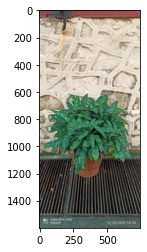

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray_img = pcv.rgb2gray_hsv(img, 'v')

In [5]:
somemask = pcv.threshold.binary(gray_img, 120)
mask = cv2.imread("./masked_collected_data/p2._mask.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [6]:
roi1 = pcv.roi.rectangle(img=img, x=0, y=600, h=500, w=500)

In [7]:
filtered_mask = pcv.roi.filter(mask=mask, roi=roi1, roi_type='partial')

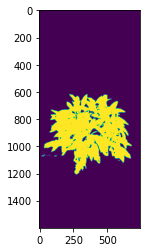

In [8]:
plt.imshow(mask)
plt.show()

### Size Analytics

In [9]:
pcv.params.debug = "plot"
# Optionally, set a sample label name
pcv.params.sample_label = "plant"

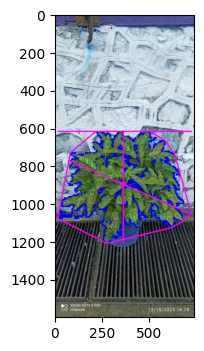

In [19]:
# Characterize object shapes
shape_image = pcv.analyze.size(img=img, labeled_mask=mask, n_labels=1)

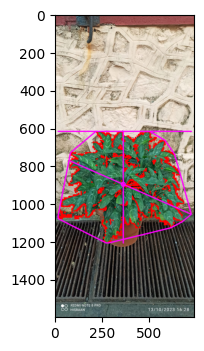

In [20]:
plt.imshow(shape_image)
plt.show()

In [12]:
pcv.print_image(shape_image, '/plant2_shape_img.png')

plant_obs = pcv.outputs.observations['plant_1']

In [23]:
plant_obs.keys()

dict_keys(['in_bounds', 'area', 'convex_hull_area', 'solidity', 'perimeter', 'width', 'height', 'longest_path', 'center_of_mass', 'convex_hull_vertices', 'object_in_frame', 'ellipse_center', 'ellipse_major_axis', 'ellipse_minor_axis', 'ellipse_angle', 'ellipse_eccentricity'])

In [24]:
plant_obs['height']

{'trait': 'height',
 'method': 'plantcv.plantcv.analyze.size',
 'scale': 'pixels',
 'datatype': "<class 'int'>",
 'value': 592,
 'label': 'pixels'}

In [29]:
plant_obs['area']['value']

5177.0

In [30]:
plant_obs['perimeter']['value']

344632.55911290646